In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
crimedata_df = pd.read_csv("../PSource/CrimeData/Crime_Data_Cleanup.csv")
crimedata_df.head()

,DR Number,Date Occurred,Area ID,Area Name,Crime Code,Crime Code Description,Crime Description Use,Victim Age,Victim Sex,Victim Descent,Premise Code,Weapon Used Code,Weapon Description,Status Description,Location,Year Occurred
0,245147,7/13/2016,5,Harbor,310,BURGLARY,BURGLARY,34,F,H,501.0,NaN,NaN,Invest Cont,"(33.8028, -118.2623)",2016
1,246300,7/13/2016,5,Harbor,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),SHOPLIFTING,0,X,X,403.0,NaN,NaN,Adult Other,"(33.7397, -118.2923)",2016
2,246765,7/13/2016,5,Harbor,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",VANDALISM,82,F,W,501.0,NaN,NaN,Invest Cont,"(33.7279, -118.2836)",2016
3,247008,7/14/2016,5,Harbor,510,VEHICLE - STOLEN,VEHICLE - STOLEN,0,NaN,NaN,101.0,NaN,NaN,Adult Arrest,"(33.7298, -118.3056)",2016
4,247028,7/13/2016,5,Harbor,510,VEHICLE - STOLEN,VEHICLE - STOLEN,0,NaN,NaN,101.0,NaN,NaN,Invest Cont,"(33.8315, -118.3065)",2016


In [4]:
crimedata_df.count()
crimedata_df.dtypes

DR Number                   int64
Date Occurred              object
Area ID                     int64
Area Name                  object
Crime Code                  int64
Crime Code Description     object
Crime Description Use      object
Victim Age                  int64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Weapon Used Code          float64
Weapon Description         object
Status Description         object
Location                   object
Year Occurred               int64
dtype: object

In [5]:
crime_type_group = crimedata_df.groupby("Crime Description Use")
crime_type_count = crime_type_group["Crime Description Use"].count()
crime_type_count

Crime Description Use
ABORTION/ILLEGAL                         3
ARSON                                 1169
ASSAULT WITH DEADLY WEAPON           33070
ATTEMPTED ROBBERY                     3913
BATTERY ASSAULT                      61931
BEASTIALITY                              6
BIKE - STOLEN                         7195
BLOCKING DOOR                            3
BOAT - STOLEN                           77
BOMB SCARE                             420
BRANDISH WEAPON                       7442
BRIBERY                                  3
BUNCO THEFT                           6519
BUNCO, ATTEMPT                         384
BURGLARY                             98349
BURGLARY, ATTEMPTED                   3772
CHILD ABANDONMENT                       31
CHILD ABUSE                           3298
CHILD ANNOYING                        1196
CHILD NEGLECT                          961
CHILD PORNOGRAPHY                      152
CHILD STEALING                         286
CONSPIRACY                      

In [6]:
#  make the list of crime type count and sort them in descending order
count_list_df=pd.DataFrame(crime_type_count)
count_list=count_list_df.sort_values(by=["Crime Description Use"],ascending=False)
count_list

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Crime Description Use' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Crime Description Use
Crime Description Use,
BURGLARY,98349
VANDALISM,64623
BATTERY ASSAULT,61931
VEHICLE - STOLEN,54113
INTIMATE PARTNER,45498
THEFT PLAIN,44951
THEFT FROM MOTOR VEHICLE,43360
THEFT OF IDENTITY,35508
ASSAULT WITH DEADLY WEAPON,33070


In [7]:
#max_df = pd.DataFrame(max50)
#max_group_df= max_df.loc["Crime Code Description","THEFT"]

In [8]:
crime_by_area = crimedata_df.groupby("Area Name")
crime_by_area = crime_by_area["Area Name"].count()
crime_by_area

Area Name
77th Street    45607
Central        35770
Devonshire     30368
Foothill       24031
Harbor         28128
Hollenbeck     26900
Hollywood      33152
Mission        31816
N Hollywood    36312
Newton         33508
Northeast      31020
Olympic        32527
Pacific        35897
Rampart        28355
Southeast      35186
Southwest      42635
Topanga        32184
Van Nuys       31515
West LA        28339
West Valley    28651
Wilshire       29429
Name: Area Name, dtype: int64

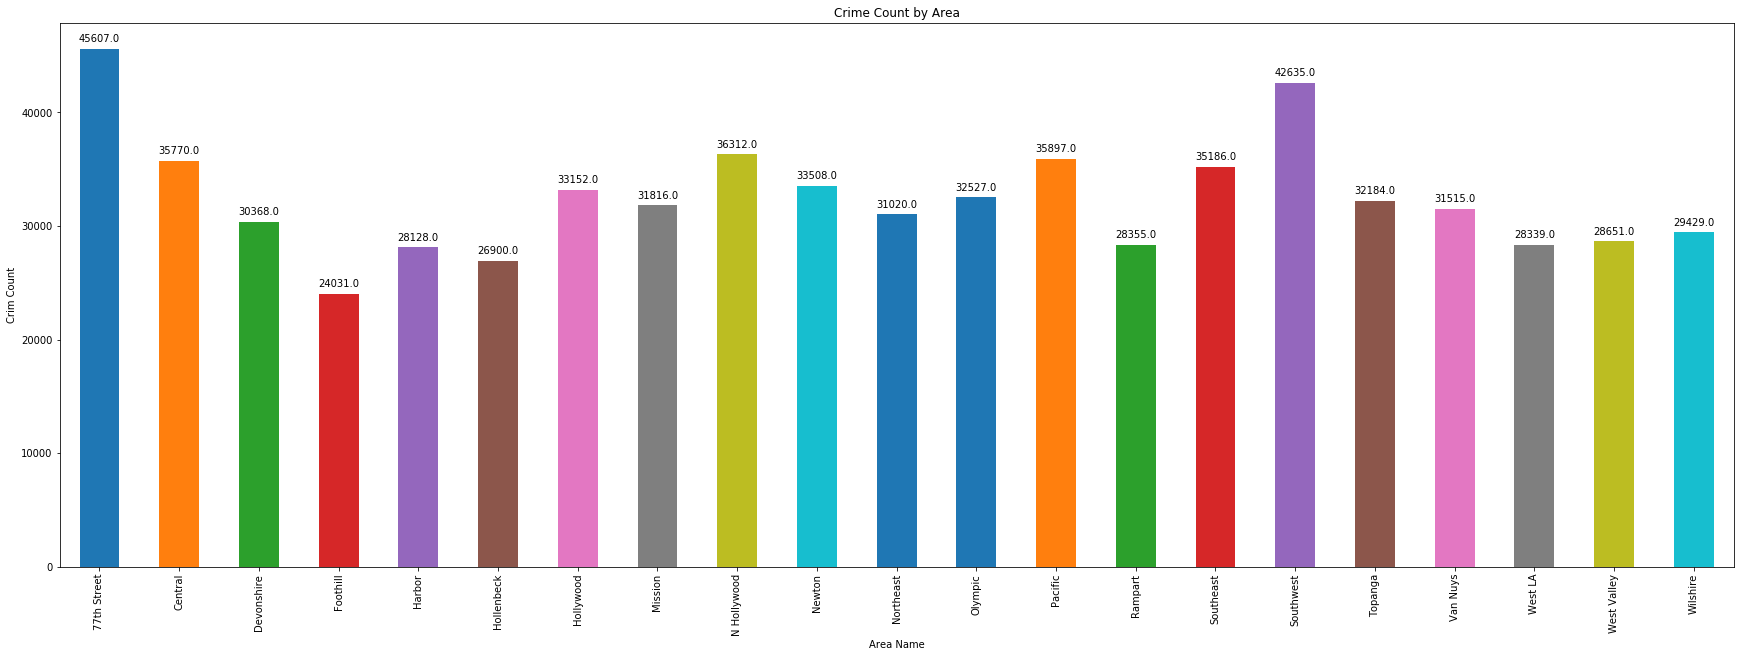

In [12]:
areachart = crime_by_area.plot(kind="bar", align="center")
plt.title("Crime Count by Area")
plt.xlabel("Area Name")
plt.ylabel("Crim Count")
plt.rcParams["figure.figsize"]=(30,20)

# creating function to add lebels to bar
def add_value_labels(areachart, spacing=5):
   

    # For each bar: Place a label
    for rect in areachart.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        areachart.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(areachart)
plt.savefig("../Crimedata Output/highest_crime_by_area_v2.png")
plt.show()


In [13]:
max10 = count_list[0:10]

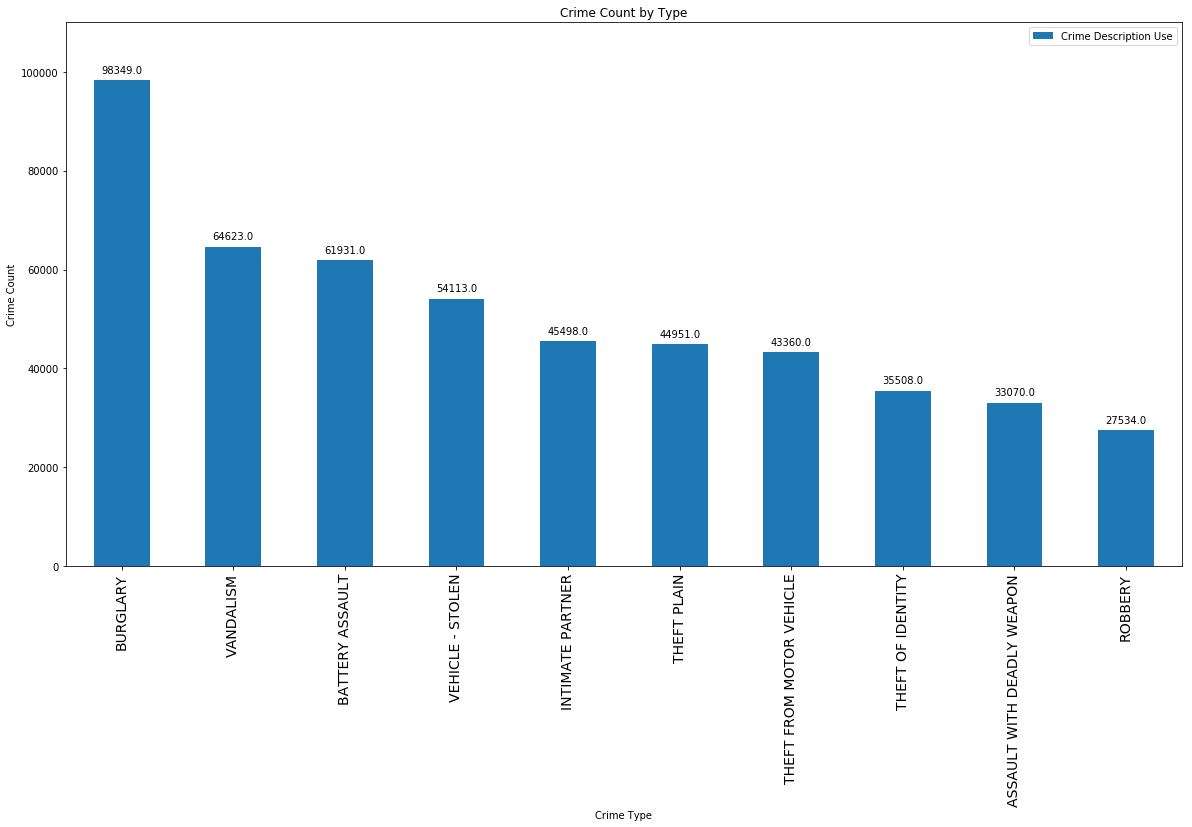

In [18]:
chart = max10.plot(kind="bar", align="center")
plt.ylim(0,110000)
#chart.set_size_inches(20,10)
#plt.figure(figsize=(50,30))
plt.rcParams["figure.figsize"]=(20,10)
plt.title("Crime Count by Type")
plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.rcParams['xtick.labelsize']=14

plt.xticks(rotation="vertical")
add_value_labels(chart)
plt.savefig("../Crimedata Output/highest_crime_type_v2.png")
plt.show()
